In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

# THE DATASETS

In [4]:
gaza_daiy_casualties = Table.read_table('casualties_daily_gaza_2025-04-12.csv')
gaza_daiy_casualties

report_date | report_source | report_period | ext_massacres_cum | killed | killed_cum | ext_killed | ext_killed_cum | ext_killed_children_cum | ext_killed_women_cum | injured_cum | ext_injured | ext_injured_cum | ext_civdef_killed_cum | med_killed_cum | ext_med_killed_cum | press_killed_cum | ext_press_killed_cum
2023-10-07  | mohtel        | 24            | 0                 | 232    | 232        | 232        | 232            | 0                       | 0                    | 1610        | 1610        | 1610            | 0                     | 6              | 6                  | 1                | 1
2023-10-08  | mohtel        | 24            | 0                 | 138    | 370        | 138        | 370            | 78                      | 41                   | 1788        | 178         | 1788            | 0                     | nan            | 6                  | 1                | 1
2023-10-09  | mohtel        | 24            | 8                 | 190    | 560        | 190        | 560            | 91                      | 61                   | 2271        | 483         | 2271            | 0                     | 6              | 6                  | 3                | 3
2023-10-10  | mohtel        | 24            | 8                 | 340    | 900        | 340        | 900            | 260                     | 230                  | 4000        | 1729        | 4000            | 0                     | nan            | 6                  | 7                | 7
2023-10-11  | gmotel        | 24            | 23                | 200    | 1100       | 200        | 1100           | 398                     | 230                  | 5184        | 1184        | 5184            | 0                     | 10             | 10                 | nan              | 7
2023-10-12  | mohtel        | 24            | 23                | 317    | 1417       | 317        | 1417           | 500                     | 276                  | 5763        | 579         | 5763            | 0                     | 11             | 11                 | nan              | 7
2023-10-13  | missing       | 24            | 23                | 483    | 1900       | 483        | 1900           | 500                     | 392                  | nan         | 1475        | 7238            | 0                     | 11             | 11                 | nan              | 7
2023-10-14  | gmotel        | 24            | 23                | 328    | 2228       | 328        | 2228           | 600                     | 600                  | 8714        | 1476        | 8714            | 0                     | 11             | 11                 | nan              | 7
2023-10-15  | gmotel        | 24            | 23                | 442    | 2670       | 442        | 2670           | 700                     | 735                  | 9200        | 486         | 9200            | 0                     | nan            | 11                 | nan              | 7
2023-10-16  | gmotel        | 24            | 371               | 138    | 2808       | 138        | 2808           | 853                     | 936                  | 10850       | 1650        | 10850           | 7                     | 37             | 37                 | nan              | 7
... (541 rows omitted)

In [19]:
west_bank_daiy_casualties = Table.read_table('casualties_daily_west_bank_2025-04-12.csv')
west_bank_daiy_casualties

report_date | verified.killed | verified.killed_cum | verified.injured | verified.injured_cum | verified.killed_children | verified.killed_children_cum | verified.injured_children | verified.injured_children_cum | killed_cum | killed_children_cum | injured_cum | injured_children_cum | settler_attacks_cum | flash_source
2023-10-07  | 6               | 6                   | 197              | 197                  | 2                        | 2                            | 31                        | 31                            | 3          | 0                   | 23          | 1                    | 3                   | un
2023-10-08  | 8               | 14                  | 127              | 324                  | 3                        | 5                            | 7                         | 38                            | 13         | 1                   | 194         | 1                    | 9                   | un
2023-10-09  | 4               | 18                  | 88               | 412                  | 0                        | 5                            | 19                        | 57                            | 15         | 3                   | 295         | 34                   | 19                  | un
2023-10-10  | 5               | 23                  | 72               | 484                  | 0                        | 5                            | 7                         | 64                            | 19         | 3                   | 332         | 39                   | 29                  | un
2023-10-11  | 6               | 29                  | 85               | 569                  | 2                        | 7                            | 17                        | 81                            | 26         | 3                   | 427         | 62                   | 39                  | un
2023-10-12  | 7               | 36                  | 49               | 618                  | 0                        | 7                            | 11                        | 92                            | 33         | 5                   | 500         | 81                   | 49                  | un
2023-10-13  | 17              | 53                  | 613              | 1231                 | 6                        | 13                           | 27                        | 119                           | 43         | 8                   | 700         | 92                   | 63                  | un
2023-10-14  | 3               | 56                  | 13               | 1244                 | 2                        | 15                           | 1                         | 120                           | 54         | 13                  | 1150        | 106                  | 67                  | un
2023-10-15  | 2               | 58                  | 18               | 1262                 | 1                        | 16                           | 2                         | 122                           | 61         | 15                  | 1173        | 113                  | 70                  | un
2023-10-16  | 2               | 60                  | 23               | 1285                 | 0                        | 16                           | 0                         | 122                           | 61         | 15                  | 1176        | 113                  | 70                  | un
... (541 rows omitted)

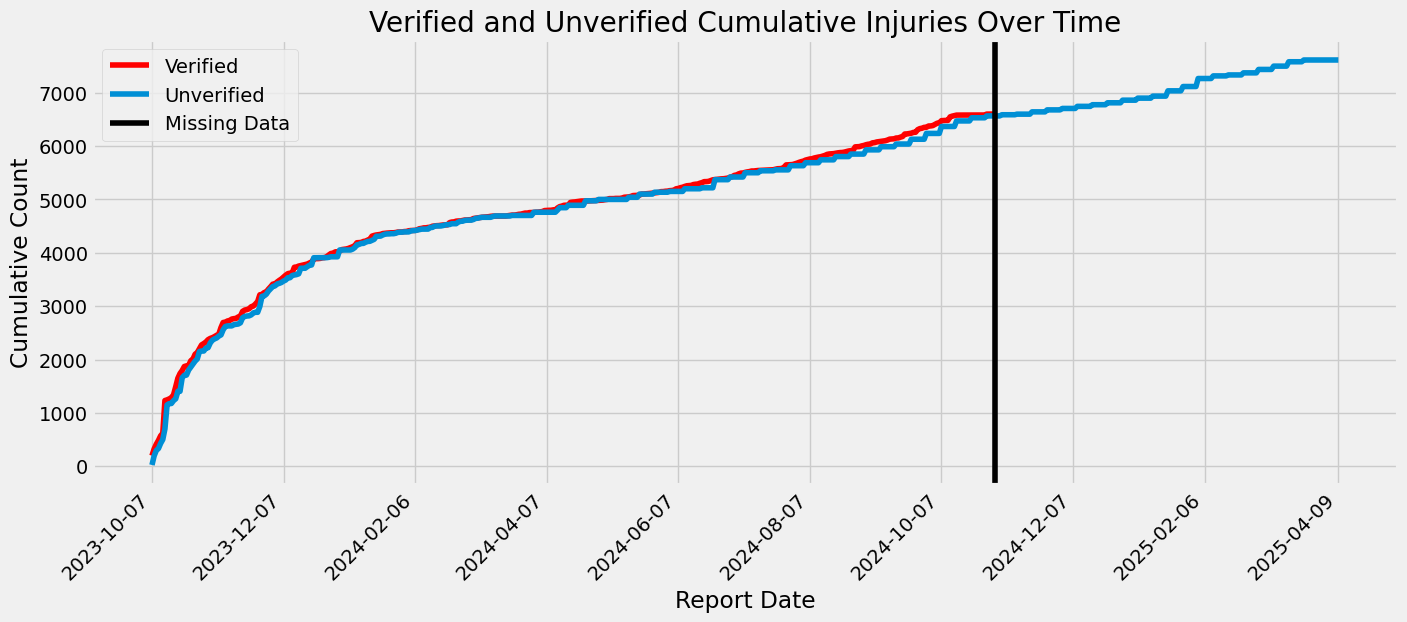

In [135]:
dates_str = west_bank_daiy_casualties.column('report_date')
verified_injured_cum = west_bank_daiy_casualties.column('verified.injured_cum')
injured_cum = west_bank_daiy_casualties.column('injured_cum')

plt.figure(figsize=(15, 5.5))

missing_date_str = '2024-11-01'

missing_index = np.where(dates_str == missing_date_str)[0][0] if missing_date_str in dates_str else len(dates_str)

plt.plot(dates_str, verified_injured_cum, color='red',label='Verified')
plt.plot(dates_str, injured_cum, label='Unverified')
plt.axvline(x=missing_date_str, color='black', label='Missing Data')

plt.xlabel('Report Date')
plt.ylabel('Cumulative Count')
plt.title('Verified and Unverified Cumulative Injuries Over Time')
plt.legend()

num_labels = 10
label_indices = np.linspace(0, len(dates_str) - 1, num_labels, dtype=int)
selected_dates = np.array(dates_str)[label_indices]
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()


In [9]:
killed_in_gaza = Table.read_table('killed-in-gaza.csv').relabeled(2,'Arabic name')
killed_in_gaza

Index | Name                             | Arabic name               | Born       | Age  | Sex  | ID number
1     | Mohammed Hani Mohammed Al-Zahhar | محمد هاني محمد الزهار     | 8/9/2023   | 0    | m    | 444196471
2     | Nour Mohammed Aed Udwan          | نور محمد عائد عدوان       | 2/27/2023  | 0    | f    | 444484729
3     | Khaled Mumin Amin Shabir         | خالد مؤمن ام6 شبير        | 4/16/2023  | 0    | m    | 444799647
4     | Yamen Ibrahim Farid Qaddoura     | يامن ابراهيم فريد قدوره   | 6/10/2023  | 0    | m    | 445958408
5     | Ahmed Rami Ahmed Abdel Qadir     | أحمد رامي أحمد عبد القادر | 12/22/2022 | 0    | m    | 445808546
6     | Houriya Ahmed Imran Ghaben       | حورية أحمد عمران غD       | 4/10/2023  | 0    | f    | 445639958
7     | Zain Mohammed Khaled Al-Houbi    | زين محمد خالد الهوبي      | 5/23/2023  | 0    | m    | 444489579
8     | Rakan Mumin Mousa Rabie          | ركان مؤمن موسي ربيع       | 9/29/2023  | 0    | m    | 444466494
9     | Taysir Mohammed Taysir Al-Hassi  | تيسير محمد تيسير الهسي    | 2/19/2023  | 0    | m    | 444496053
10    | Kenan Akram Samih Karim          | كنان اكرم سميح كريم       | 8/5/2023   | 0    | m    | 445362098
... (50010 rows omitted)

In [38]:
infrastructure_damaged = Table.read_table('infrastructure-damaged.csv')
infrastructure_damaged

report_date | civic_buildings__destroyed | civic_buildings__ext_destroyed | educational_buildings__destroyed | educational_buildings__ext_destroyed | educational_buildings__damaged | educational_buildings__ext_damaged | places_of_worship__mosques_destroyed | places_of_worship__ext_mosques_destroyed | places_of_worship__mosques_damaged | places_of_worship__ext_mosques_damaged | places_of_worship__churches_destroyed | places_of_worship__ext_churches_destroyed | residential__destroyed | residential__ext_destroyed
2023-10-07  | nan                        | 5                              | nan                              | 1                                    | nan                            | 15                                 | nan                                  | 2                                        | nan                                | 4                                      | nan                                   | 0                                         | nan                    | 80
2023-10-08  | nan                        | 11                             | nan                              | 1                                    | nan                            | 30                                 | nan                                  | 4                                        | nan                                | 8                                      | nan                                   | 0                                         | 159                    | 159
2023-10-09  | nan                        | 16                             | nan                              | 2                                    | nan                            | 45                                 | nan                                  | 6                                        | nan                                | 12                                     | nan                                   | 0                                         | 790                    | 790
2023-10-10  | nan                        | 22                             | nan                              | 2                                    | nan                            | 60                                 | nan                                  | 8                                        | nan                                | 17                                     | nan                                   | 0                                         | 1009                   | 1009
2023-10-11  | 27                         | 27                             | 3                                | 3                                    | 75                             | 75                                 | 10                                   | 10                                       | nan                                | 21                                     | nan                                   | 0                                         | 2835                   | 2835
2023-10-12  | nan                        | 29                             | 3                                | 3                                    | 75                             | 75                                 | 10                                   | 10                                       | nan                                | 25                                     | nan                                   | 0                                         | nan                    | 4188
2023-10-13  | nan                        | 31                             | nan                              | 9                                    | nan                            | 100                                | nan                                  | 12                                       | nan                                | 29                                     | nan                                   | 0                                         | 5540                   | 5540
2023-10-14  | nan             

# Plot 1

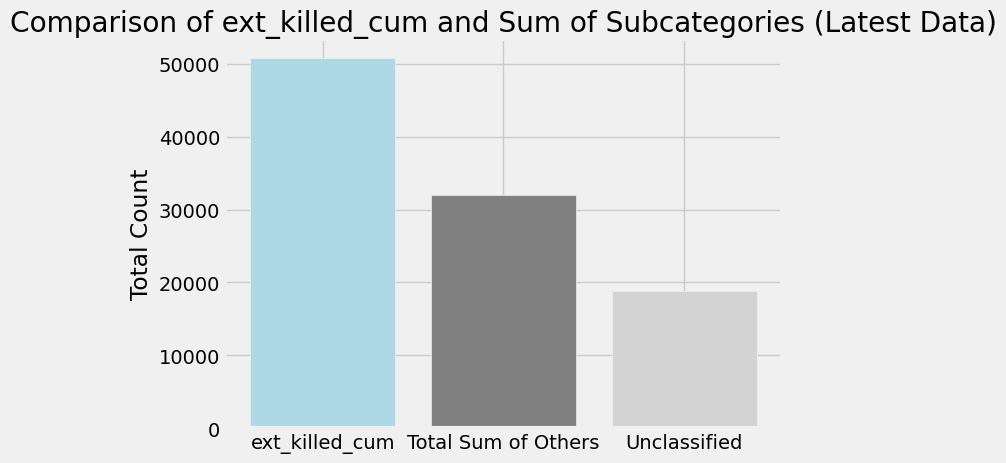

In [28]:

gaza_daiy_casualties_sorted = gaza_daiy_casualties.sort("report_date", descending=True)

ext_columns = gaza_daiy_casualties_sorted.select(
    "report_date", 
    "ext_killed_cum", 
    "ext_killed_children_cum", 
    "ext_killed_women_cum", 
    "ext_civdef_killed_cum", 
    "ext_med_killed_cum", 
    "ext_press_killed_cum"
)


latest_report = ext_columns.take(1)


total_sum = 0


columns_to_sum = [
    "ext_killed_children_cum", 
    "ext_killed_women_cum", 
    "ext_civdef_killed_cum", 
    "ext_med_killed_cum", 
    "ext_press_killed_cum"
]


for col in columns_to_sum:
    value = latest_report.column(col).item(0)
    if value is not None and value != '':
        total_sum += value

ext_killed_cum = latest_report.column("ext_killed_cum").item(0)


unclassified = ext_killed_cum - total_sum
categories = ['ext_killed_cum', 'Total Sum of Others', 'Unclassified']
values = [ext_killed_cum, total_sum, unclassified]

plt.bar(categories, values, color=['lightblue', 'grey', 'lightgray'])
plt.ylabel('Total Count')
plt.title('Comparison of ext_killed_cum and Sum of Subcategories (Latest Data)')
plt.show()
